In [1]:
#Para bajar los paquetes descomentar esta línea
#using Pkg; Pkg.instantiate()

using EVQueues, Plots

In [2]:
lambda=120.0;
mu=1.0;
gamma=1.0;
C=60.0;

Tfinal=200.0;

In [3]:
sim = ev_edf(lambda,mu,gamma,Tfinal,C,snapshots=[Tfinal])
compute_statistics!(sim)

Simulando... 100%|██████████████████████████████████████| Time: 0:00:03


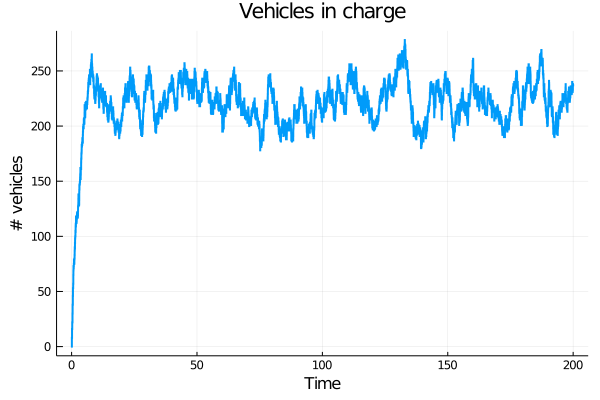

In [4]:
#TIme plot of occupation and power
p = plot(  xlabel="Time",
            ylabel="# vehicles",
            title="Vehicles in charge")

plot!(p, sim.timetrace.T[1:10:end], sim.timetrace.X[1:10:end],lt=:steppost,linewidth=2,legend=:none)

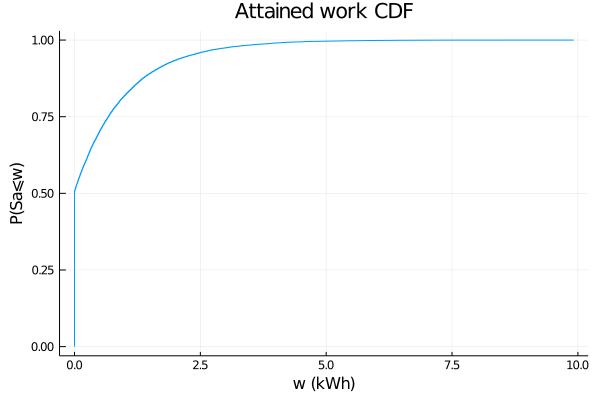

In [5]:
#CDF of departure attained workloads

Sa = sort([ev.departureWorkload for ev in sim.EVs]);
n = length(Sa);
p = plot(   xlabel="w (kWh)",
            ylabel="P(Sa⩽w)",
            title="Attained work CDF")

plot!(p,Sa,(1:n)/n,lt=:steppost,legend=:none)

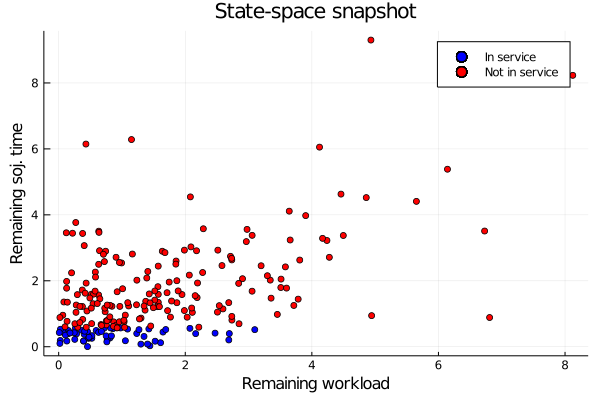

In [6]:
#State space of the last snapshot
snap = sim.snapshots[end];

w = [ev.currentWorkload for ev in snap.charging];
d = [ev.currentDeadline for ev in snap.charging];
on = [ev.currentPower>0 for ev in snap.charging];

p = plot(   xlabel = "Remaining workload",
            ylabel = "Remaining soj. time",
            title = "State-space snapshot")

scatter!(p,w[on.==true],d[on.==true],markershape=:circle,markersize=4,color=:blue,label="In service")
scatter!(p,w[on.==false],d[on.==false],markershape=:circle,markersize=4,color=:red,label="Not in service")

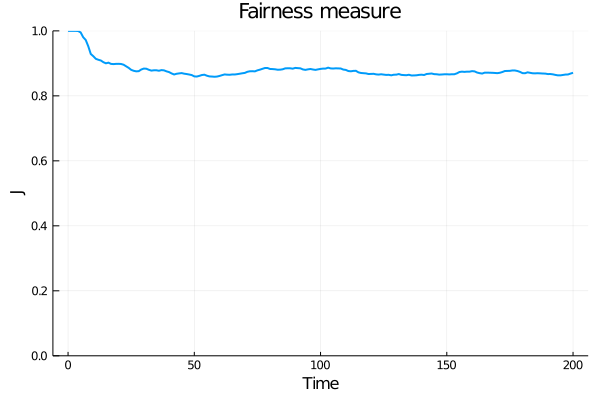

In [8]:
#fairness measure over time

t=collect(0:Tfinal);
h=20.0;
J=compute_fairness(sim,t,h)

p = plot(   xlabel = "Time",
            ylabel = "J",
            title = "Fairness measure",
            ylim = (0,1)
            )

plot!(p,t,J,lw=2,legend=:none)